In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import sys, os
from matplotlib import pyplot as plt
from sklearn.utils import resample
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score 
from sklearn.preprocessing import LabelEncoder
from itertools import product
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
voice_df = pd.read_csv('voice.csv')
voice_df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [3]:
print("Size of Gender Recognition dataset       :",voice_df.shape)

Size of Gender Recognition dataset       : (3168, 21)


In [4]:
voice_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non-null   float64
 18  dfrange   3168 non-null   float64
 19  modindx   3168 non-null   float64
 20  label     3168 non-null   obje

In [5]:
voice_df.describe().T

,count,mean,std,min,25%,50%,75%,max
meanfreq,3168.0,0.180907,0.029918,0.039363,0.163662,0.184838,0.199146,0.251124
sd,3168.0,0.057126,0.016652,0.018363,0.041954,0.059155,0.067020,0.115273
median,3168.0,0.185621,0.036360,0.010975,0.169593,0.190032,0.210618,0.261224
Q25,3168.0,0.140456,0.048680,0.000229,0.111087,0.140286,0.175939,0.247347
Q75,3168.0,0.224765,0.023639,0.042946,0.208747,0.225684,0.243660,0.273469
IQR,3168.0,0.084309,0.042783,0.014558,0.042560,0.094280,0.114175,0.252225
skew,3168.0,3.140168,4.240529,0.141735,1.649569,2.197101,2.931694,34.725453
kurt,3168.0,36.568461,134.928661,2.068455,5.669547,8.318463,13.648905,1309.612887
sp.ent,3168.0,0.895127,0.044980,0.738651,0.861811,0.901767,0.928713,0.981997
sfm,3168.0,0.408216,0.177521,0.036876,0.258041,0.396335,0.533676,0.842936


In [6]:
voice_df.isna().sum()    

meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64

In [7]:
voice_df.isnull().sum()   

meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64

<AxesSubplot:xlabel='label', ylabel='count'>

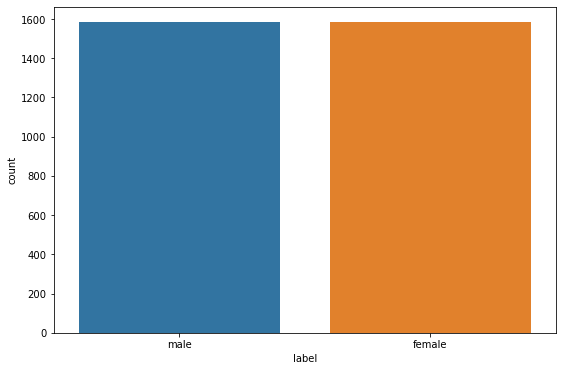

In [8]:
plt.figure(figsize=(9,6))
sns.countplot(x='label', data=voice_df, order=["male", "female"] )

In [9]:
voice_df['label'].value_counts()           # Prints the count of different classes in 'label'

male      1584
female    1584
Name: label, dtype: int64

In [10]:
# creating instance of labelencoder
label_encode = LabelEncoder()

In [11]:
# Perform Encoding by coverting 'label' feature into numerical form
voice_df['label'] = label_encode.fit_transform(voice_df['label'])

In [12]:
voice_df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,1
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,1
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,1
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,1
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,1


In [13]:
voice_df.columns

Index(['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt',
       'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun',
       'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx', 'label'],
      dtype='object')

In [14]:
print(voice_df["label"].value_counts())

1    1584
0    1584
Name: label, dtype: int64


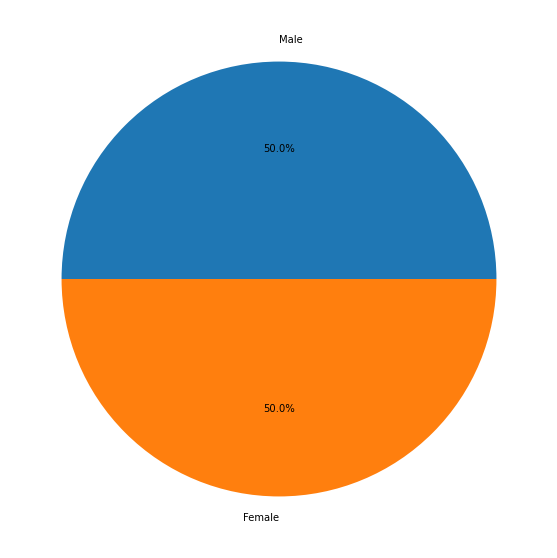

In [15]:
ax = voice_df['label'].value_counts().plot(kind='pie', figsize=(14,10), autopct='%1.1f%%', labels=["Male","Female"])
ax.axes.get_yaxis().set_visible(False)

# Model Building

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [17]:
x = voice_df.iloc[:,:-1]
y = voice_df.iloc[:,-1]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(2534, 20)
(634, 20)
(2534,)
(634,)


In [18]:
def gen_metrics(model,x_train,x_test,y_train,y_test):
    model.fit(x_train,y_train)
    print('Training score',model.score(x_train,y_train))
    print('Testing score',model.score(x_test,y_test))
    ypred = model.predict(x_test)
    print('predicted Results\n',ypred)
    cm = confusion_matrix(y_test,ypred)
    print('Confusion Matrix\n',cm)
    print('Classficaition Report\n',classification_report(y_test,ypred))

# 1) Decision Tree Classifier

In [19]:
m1 = DecisionTreeClassifier(criterion='gini',max_depth=8,min_samples_split=14)
gen_metrics(m1,x_train,x_test,y_train,y_test)

Training score 0.9869771112865036
Testing score 0.9668769716088328
predicted Results
 [0 1 0 0 1 1 0 1 0 1 1 1 0 1 1 0 0 0 0 0 0 0 1 1 0 1 0 1 1 1 0 0 1 0 1 0 1
 1 1 0 0 0 0 1 1 0 0 0 1 0 0 0 0 1 1 1 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0
 1 1 1 0 0 1 0 0 1 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 1 0 0 1 1 0 0 0 0 1 0 1 1
 1 0 1 1 0 1 1 1 0 0 1 1 0 1 1 0 0 0 1 1 1 1 0 1 1 1 1 1 1 0 1 1 0 0 1 1 1
 1 1 1 1 1 1 1 0 1 0 0 0 1 0 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1 1 0 0 0 1 1 1 0
 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 1 0 1 0 1 0 1 1 0 1 0 0 1 0 1 1 0 0 0 0 0
 0 0 1 1 1 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 1 1 0 1 1 0 1 0 0 1 1 1 0 1 0 0 0
 1 1 0 1 1 1 0 1 1 0 1 0 1 1 0 1 0 0 1 1 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 1 1
 0 0 1 0 1 0 0 0 1 0 1 0 1 1 1 1 0 1 0 0 0 1 1 0 1 0 0 0 0 1 1 1 1 1 0 1 1
 0 0 0 1 1 1 1 0 1 1 0 1 1 1 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 1 0 1 1 1
 0 0 0 0 1 1 1 1 0 0 1 1 1 0 0 1 1 1 1 1 1 1 0 0 0 0 0 0 1 1 0 1 0 1 0 1 0
 0 1 1 0 1 0 1 0 1 1 0 1 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 1 1 0 0 0 1 0
 0 0 0 0 1 0 0

# 2) Random Forest Classifer

In [20]:
m2 = RandomForestClassifier(n_estimators=150,criterion='entropy',max_depth=12)
gen_metrics(m2,x_train,x_test,y_train,y_test)

Training score 0.999605367008682
Testing score 0.9794952681388013
predicted Results
 [0 1 0 0 1 1 0 1 0 1 1 1 0 1 1 0 0 0 0 0 0 0 1 1 0 1 0 1 1 1 0 0 1 0 1 0 1
 1 1 0 0 1 0 1 1 0 0 0 1 0 0 0 0 1 1 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 1 1 1 0 0 1 1 0 1 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 1 0 0 1 1 0 0 0 0 1 0 1 1
 1 0 1 1 0 1 1 1 0 0 1 1 0 1 1 0 1 0 1 1 1 1 0 1 1 1 0 1 0 0 1 1 0 0 1 1 1
 1 1 1 1 1 1 1 0 1 0 0 0 1 0 1 1 0 0 0 1 1 1 1 1 1 1 0 1 1 1 0 0 0 1 1 1 0
 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 1 0 1 0 1 0 1 1 0 1 0 0 1 0 1 1 0 0 0 0 0
 0 0 1 1 1 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 1 1 0 1 1 0 1 0 0 1 1 1 0 1 0 0 0
 1 1 0 1 1 1 0 1 1 0 1 0 1 1 0 1 0 0 1 1 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 1 1
 0 0 1 1 1 0 0 0 1 0 1 0 1 1 1 1 1 1 1 0 0 1 1 0 1 0 0 0 0 1 1 1 1 1 0 1 1
 0 0 0 1 1 1 1 0 1 1 0 1 1 1 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 1 0 1 1 1
 0 0 0 0 1 1 1 1 0 0 1 1 1 0 0 1 1 1 1 1 1 1 0 0 0 0 0 0 1 1 0 1 0 1 0 1 0
 0 1 1 0 1 0 1 0 1 1 0 1 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 1 1 0 0 1 1 0
 0 0 0 0 1 0 0 

# 3) KNN Classifier

In [21]:
m3 = KNeighborsClassifier(n_neighbors=27)
gen_metrics(m3,x_train,x_test,y_train,y_test)

Training score 0.7245461720599842
Testing score 0.7129337539432177
predicted Results
 [0 1 0 1 1 0 0 1 0 0 1 1 1 1 0 0 0 1 1 0 1 0 1 1 0 1 0 1 1 0 0 1 1 0 1 0 0
 0 1 0 0 1 0 1 1 0 0 1 1 0 1 0 0 1 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 0
 0 1 0 0 1 1 1 1 1 1 0 1 0 0 1 1 0 0 1 0 0 1 1 1 1 1 0 1 0 0 0 0 0 1 0 0 0
 1 1 1 1 0 0 1 0 0 0 1 1 1 1 1 1 1 0 1 1 1 0 0 1 1 1 1 1 0 0 0 1 0 0 1 1 1
 1 1 1 1 1 1 1 0 1 0 0 0 1 0 1 1 0 0 1 0 1 1 1 1 1 0 0 1 1 1 0 1 0 1 1 1 0
 1 0 1 1 0 1 0 0 0 1 0 1 0 0 0 0 1 1 1 1 0 0 1 1 0 0 0 0 1 0 1 1 0 1 0 0 0
 1 0 1 1 1 0 0 0 0 0 0 1 0 1 0 1 1 1 0 0 1 1 0 0 1 0 1 0 0 1 1 0 0 1 0 0 0
 1 1 0 1 1 0 0 0 1 1 1 0 0 0 0 1 0 1 1 0 0 0 1 1 1 1 0 1 0 0 1 0 0 1 0 1 1
 0 0 1 1 0 0 1 1 0 0 1 0 0 1 0 0 0 1 1 0 0 1 1 0 1 0 0 1 0 0 1 0 0 1 1 1 1
 0 0 0 1 1 0 1 0 0 1 0 0 1 1 1 0 0 1 0 1 1 0 0 0 1 1 0 0 0 0 0 0 1 1 0 0 1
 1 1 0 0 0 0 1 1 0 1 0 1 1 0 0 1 1 0 1 0 1 1 0 0 0 0 0 1 1 1 1 1 0 1 1 1 0
 1 1 1 1 0 0 1 1 1 1 0 1 1 1 0 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 1 1 0 1 1 0
 1 0 1 0 1 1 0

## 4) Logistic Regression

In [22]:
m4 = LogisticRegression(max_iter=1000)
gen_metrics(m4,x_train,x_test,y_train,y_test)

Training score 0.909234411996843
Testing score 0.9069400630914827
predicted Results
 [0 1 0 0 1 1 0 1 0 1 1 1 0 1 1 0 0 0 0 0 1 0 1 1 0 1 0 1 1 1 0 0 1 0 1 0 1
 1 1 1 0 1 0 1 1 0 0 0 1 0 0 0 0 1 1 1 1 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0
 1 1 1 0 1 1 1 1 1 1 1 0 0 1 0 0 0 0 1 1 1 1 1 1 1 0 0 1 1 0 0 0 0 1 1 1 1
 1 0 1 1 0 1 1 1 0 0 1 1 0 1 1 0 1 0 1 1 1 1 0 1 1 1 0 1 1 1 1 1 0 0 1 1 1
 1 1 1 1 1 1 1 0 1 0 0 0 1 0 1 1 0 0 0 1 1 1 1 1 1 1 0 1 1 1 0 0 0 1 1 1 0
 0 0 1 1 0 1 0 0 0 1 0 1 0 0 1 0 1 1 1 0 1 0 1 1 0 1 0 0 1 0 1 1 0 1 0 0 0
 0 0 1 1 1 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 1 1 0 0 1 1 1 0 1 0 0 0
 1 1 0 1 1 1 0 1 1 0 1 0 1 1 0 1 0 1 1 1 1 0 0 1 0 1 1 1 0 1 0 0 0 1 1 1 1
 0 0 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 1 1 0 0 1 1 0 1 0 0 1 0 1 1 1 1 1 1 1 1
 0 0 0 1 1 1 1 0 1 1 0 1 1 1 1 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 1 0 1 1 1
 0 0 0 0 1 1 1 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0
 0 1 1 0 1 0 1 1 1 1 0 1 1 0 0 0 1 0 0 0 0 1 0 0 1 0 0 1 0 1 1 1 1 0 0 1 0
 1 1 0 0 1 1 0 

# 5)SVM Classifer

In [23]:
m5 = SVC(kernel='linear',C=1)
gen_metrics(m5,x_train,x_test,y_train,y_test)

Training score 0.9187056037884768
Testing score 0.9211356466876972
predicted Results
 [0 1 0 0 1 1 0 1 0 1 1 1 0 1 1 0 0 0 0 0 1 1 1 1 0 1 0 1 1 1 0 0 1 0 1 0 1
 1 1 1 0 1 0 1 1 0 0 0 1 0 0 0 0 1 1 1 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0
 1 1 1 0 1 1 1 1 1 1 1 0 0 1 0 0 0 0 1 0 1 1 1 1 1 0 0 1 1 0 0 0 0 1 1 1 1
 1 0 1 1 0 1 1 1 0 0 1 1 0 1 1 0 1 0 1 1 1 1 0 1 1 1 0 1 1 1 1 1 0 0 1 1 1
 1 1 1 1 1 1 1 0 1 0 0 0 1 0 1 1 0 0 0 1 1 1 1 1 1 1 0 1 1 1 0 0 0 1 1 1 0
 0 0 1 1 0 1 0 1 0 1 0 1 0 0 1 0 1 1 1 0 1 0 1 1 0 1 0 0 1 0 1 1 0 1 0 0 0
 0 0 1 1 1 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 1 1 0 0 1 1 1 0 1 0 0 0
 1 1 0 1 1 1 0 1 1 0 1 0 1 1 0 1 0 0 1 1 1 0 0 1 0 1 1 1 0 0 0 0 0 1 1 1 1
 0 0 1 1 1 0 1 1 1 0 1 0 1 1 1 1 1 1 1 0 0 1 1 0 1 0 0 1 0 1 1 1 1 1 1 1 1
 0 0 0 1 1 1 1 0 1 1 0 1 1 1 1 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 1 0 1 1 1
 0 0 0 0 1 1 1 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0
 0 1 1 0 1 0 1 1 1 1 0 1 1 0 0 0 1 0 0 0 0 1 0 0 1 0 0 1 0 1 1 1 1 0 1 1 0
 1 1 0 0 1 0 0

# RANDON FOREST CLASSIFIER GIVES THE BEST ACCURACY OF  0.98